In [2]:
import os, shutil
import matplotlib.pyplot as plt
from keras.utils import image_dataset_from_directory
from tensorflow import keras
from keras import layers
from keras import models
import tensorflow as tf
from keras.preprocessing import image

2024-03-08 18:36:23.713763: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 18:36:23.713806: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 18:36:23.746057: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-08 18:36:23.812829: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-08 18:36:24.773274: W tensorflow/compiler/tf2

In [4]:
train_dir = '../Generator/dataset/train'
test_dir = '../Generator/dataset/test'
train_square_dir = train_dir + '/square'
train_circle_dir = train_dir + '/circle'
train_none_dir = train_dir + '/none'
train_cirlce_square_dir = train_dir + '/square_circle'
test_cirlce_square_dir = test_dir + '/square_and_circle'

total training cat images: 4
total training dog images: 1
total validation cat images: 750
total validation dog images: 750
total testing cat images: 750
total testing dog images: 750
total testing dog images: 1000


In [5]:
IMG_SIZE = 500
train_dataset = image_dataset_from_directory(train_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32)
test_dataset = image_dataset_from_directory(test_dir, image_size=(IMG_SIZE, IMG_SIZE),batch_size=32)

Found 3000 files belonging to 4 classes.


2024-03-08 18:39:57.311506: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-08 18:39:57.433969: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-08 18:39:57.434104: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 1000 files belonging to 1 classes.


In [17]:
for data_batch, labels_batch in train_dataset:
    print('data batch shape:', data_batch)
    print('labels batch shape:', labels_batch)
    break

data batch shape: tf.Tensor(
[[[[204. 219. 240.]
   [204. 219. 240.]
   [204. 219. 240.]
   ...
   [204. 219. 240.]
   [204. 219. 240.]
   [204. 219. 240.]]

  [[204. 219. 240.]
   [204. 219. 240.]
   [204. 219. 240.]
   ...
   [204. 219. 240.]
   [204. 219. 240.]
   [204. 219. 240.]]

  [[204. 219. 240.]
   [204. 219. 240.]
   [204. 219. 240.]
   ...
   [204. 219. 240.]
   [204. 219. 240.]
   [204. 219. 240.]]

  ...

  [[204. 219. 240.]
   [204. 219. 240.]
   [204. 219. 240.]
   ...
   [204. 219. 240.]
   [204. 219. 240.]
   [204. 219. 240.]]

  [[204. 219. 240.]
   [204. 219. 240.]
   [204. 219. 240.]
   ...
   [204. 219. 240.]
   [204. 219. 240.]
   [204. 219. 240.]]

  [[204. 219. 240.]
   [204. 219. 240.]
   [204. 219. 240.]
   ...
   [204. 219. 240.]
   [204. 219. 240.]
   [204. 219. 240.]]]


 [[[124. 202.   4.]
   [124. 202.   4.]
   [124. 202.   4.]
   ...
   [124. 202.   4.]
   [124. 202.   4.]
   [124. 202.   4.]]

  [[124. 202.   4.]
   [124. 202.   4.]
   [124. 202.   4.]

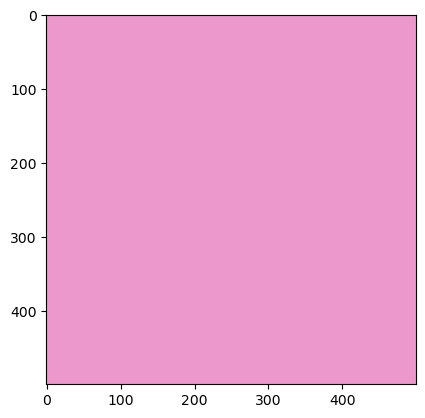

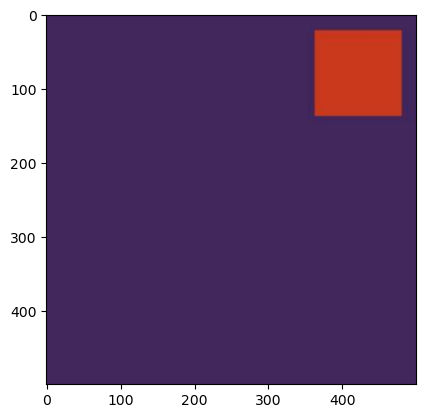

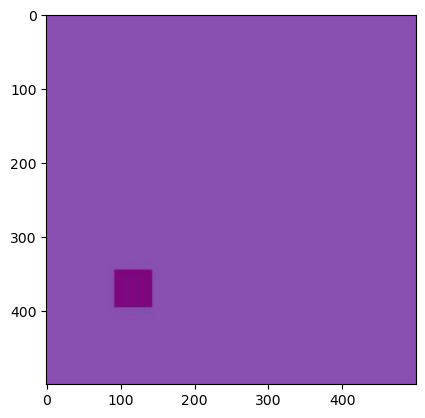

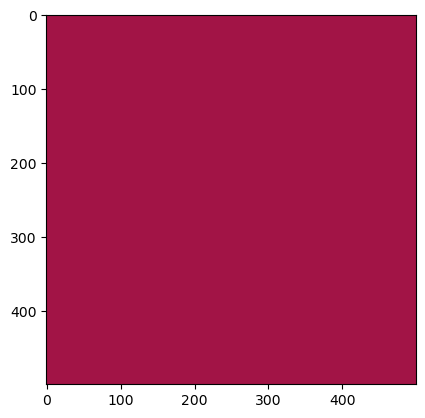

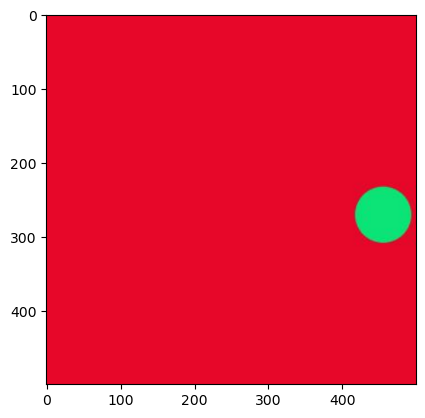

In [8]:
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [9]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(4, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                        

In [10]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [13]:
history = model.fit(train_dataset, epochs=5)

Epoch 1/5


94/94 [==============================] - 18s 192ms/step - loss: -2777345280.0000 - acc: 0.2500
Epoch 2/5
94/94 [==============================] - 18s 192ms/step - loss: -5611696128.0000 - acc: 0.2500
Epoch 3/5
94/94 [==============================] - 18s 194ms/step - loss: -10455851008.0000 - acc: 0.2500
Epoch 4/5
94/94 [==============================] - 18s 194ms/step - loss: -18285846528.0000 - acc: 0.2500
Epoch 5/5
94/94 [==============================] - 18s 189ms/step - loss: -30864105472.0000 - acc: 0.2500


In [16]:

print('Test:', model.predict(test_dataset))

32/32 [==============================] - 1s 15ms/step - loss: 0.5969 - acc: 0.7380
val_acc: 0.7379999756813049


In [11]:
# model.save('models/04_CNN_02_CatsAndDogs_01_cnn_from_scratch.h5')

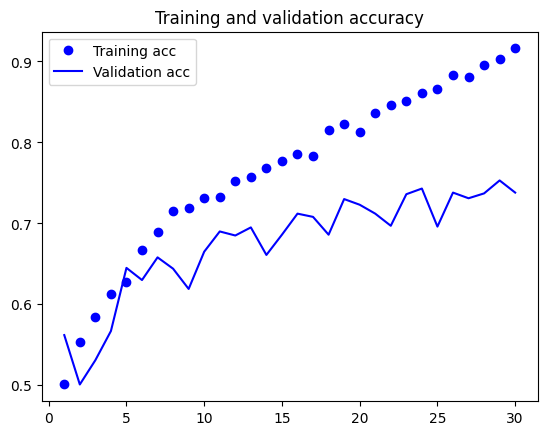

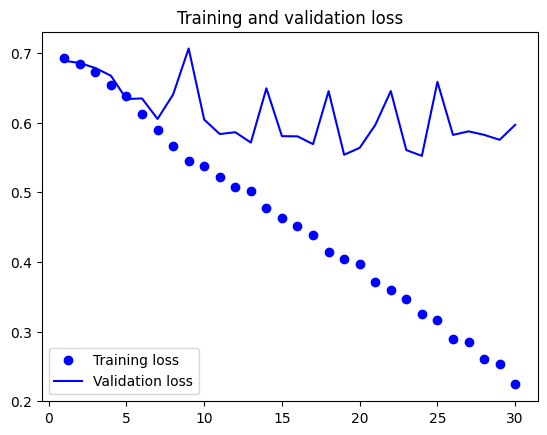

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
img = tf.keras.preprocessing.image.load_img('cats_and_dogs_small/validation/dogs/dog.1010.jpg', target_size=(150, 150), interpolation='bilinear')

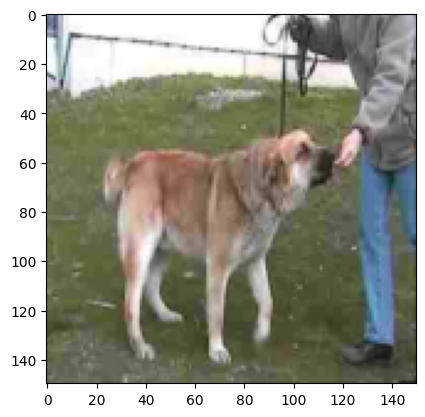

In [14]:
plt.imshow(img)
plt.show()

In [15]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
print(img_array.shape)
result = model.predict(img_array)
print("Result: ", result.round())

(1, 150, 150, 3)
1/1 [==============================] - 0s 349ms/step
Result:  [[1.]]
